In [22]:
# import the items we need
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
import seaborn
seaborn.set_style("darkgrid")
import requests
import json


In [23]:
#Location
#we define some locations from which the user can choose
#API we will use only accepts WG84 coordinates and not place names
#https://gisgeography.com/wgs84-world-geodetic-system/
# Define some Locations to choose from.
# Latitude and Longitude

locations = {
    'Russia': ['61.5240', '105.3188'],
    'China': ['35.8617', '104.1954'],
    'United States': ['37.0902', '95.7129'],
    'Canada': ['56.1304', '106.3468'],
    'Toronto': ['43.6532', '79.3832'],
}

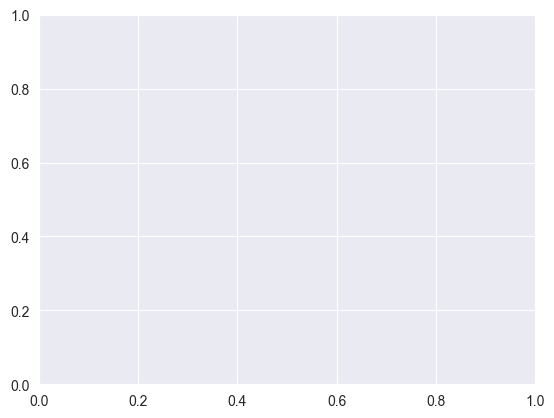

In [24]:
#Matplotlib Setup
# Setting Up Matplotlib, using the OOP Approach
fig, ax = plt.subplots()
# the plot is created with the first location
p = None

In [25]:
#Get the Temperatire Functions
# make a function to get the temperatures of a given location
# get the lat and long of the location
#https://open-meteo.com/en/docs#api_form
# make a function to get the temperatures of a given location
def getTemperatures(location):
    # get the lat and long of the location
    lat, lon = locations[location]
    req = requests.get(f'https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m')
    req = json.loads(req.text)
    # get the tempratures
    temperatures = req['hourly']['temperature_2m']
    # get the times
    times = req['hourly']['time']
    return times, temperatures

In [26]:
#Download and storing data
# Make a dictionary with the locations as keys and the getTemperatures() function as values
location2data = {}
for location in locations:
    location2data[location] = getTemperatures(location)

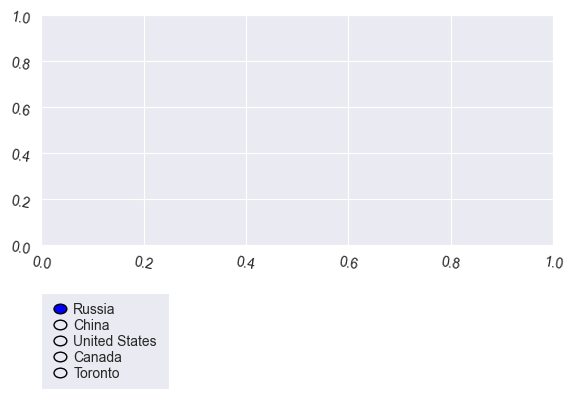

In [27]:
def changeLocation(newLocation):
    global p
    # get the data of the location from the dictionary
    times, temperatures = location2data[newLocation]
    if p:
        p.set_ydata(temperatures)
        # reflect changes in the plot
        plt.draw()
    else:
        # Make a Plot and save the first object to a variable
        # p will be a Line2D object which can be changed at a later time
        p = ax.plot(times, temperatures, ls=':', lw=3)[0]
        # set the x-axis to the times
        xRange = list(range(0, 168, 24)) + [168]
        ax.set_xticks(xRange)
        # set the y-axis to the temperatures
        yRange = list(range(-20, 55, 5))
        ax.set_yticks(yRange)
        plt.tick_params(axis="both", which='both', labelrotation=-10) # rotate the labels
    # set the title
    ax.set_title('Temperatures in ' + newLocation)


# Call the change Location function for the first time
changeLocation('Russia')

# Making the Radio Buttons
buttons = RadioButtons(
    ax=plt.axes([0.1, 0.1, 0.2, 0.2]),
    labels=locations.keys()
)

# Connect click event on the buttons to the function that changes location.
buttons.on_clicked(changeLocation)

# adjust the plot size
plt.subplots_adjust(left=0.1, bottom=0.40)

# Label the Plot
ax.set_xlabel('Times [Next Seven Days]')
# ax.xaxis.label.set_color(labelColor)

ax.set_ylabel('Temperatures [Celcius]')
# ax.yaxis.label.set_color(labelColor)

plt.savefig('file.svg', format='svg')

plt.show()